In [1]:
# グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt

# データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt

plt.style.use('ggplot') 

In [2]:
df = pd.read_csv('isopppcom_browsers.csv')
df = df.dropna()
df['width'] = df.replace('x\d*', {'width_height': ''}, regex=True).width_height.values
df = df.astype({'width': 'int64'})
df = df[df['device'].isin(['desktop'])]
df = df.reset_index()
df = df.sort_values(by=["width"], ascending=False)
df = df.filter(items=['width', 'user'])
df.head()

,width,user
15,3072,1
14,2880,1
4,2560,8
13,2048,1
0,1920,31


<Figure size 432x288 with 0 Axes>

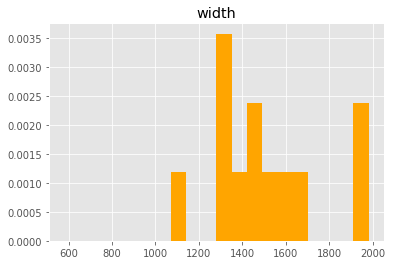

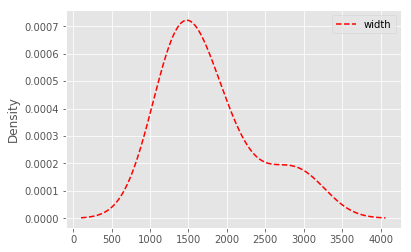

In [7]:
# https://note.nkmk.me/python-pandas-plot/
# from pylab import rcParams
# from scipy.stats import norm
# rcParams['figure.figsize'] = 10,10
plt.figure()
df.hist(bins=20, column="width", density=True, color='orange', range=(580, 1980))
plt.savefig('./export/hist.png')
df.plot(kind='kde', style='r--', y=df.columns[0], x=df.columns[1])
plt.savefig('./export/plot.png')
plt.show()